<a href="https://colab.research.google.com/github/chenglong96/Data_Analytics/blob/main/SHIELD_Data_Analyst_Risk_Assessment_Wong_Cheng_Long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SHIELD_Data_Analyst_Risk_Assessment_Wong_Cheng_Long

#Part 1: SQL Exploration

In [1]:
#getting necessary packages in.
import sqlite3
import pandas as pd

In [43]:
#loading the xlsx file in.
df = pd.read_excel('/content/Data_Analyst__Risk__Assessment_Dataset.xlsx')

In [42]:
#creating a database called variants_data.db
conn = sqlite3.connect('variants_data.db')

## 1. DDL Statement

In [4]:
#uploading the excel file data from panda into variants_data database
df.to_sql('variants_data', conn, if_exists='replace', index=False)


# the method used above is just to upload the excel file data into the SQL table which wipes anything that could be inside as it is replace.
# if a CREATE TABLE statement is needed, it would be
# CREATE TABLE variants_data (
#     approximated_class_label TEXT,
#     variant_001 TEXT,
#     variant_002 TEXT,
#     variant_003 TEXT,
#     variant_004 TEXT,
#     variant_005 TEXT )
#     df.to_sql('variants_data', conn, if_exists='append', index=False)



20000

In [5]:
#just to double sql table is correct
result = pd.read_sql("SELECT * FROM variants_data ;", conn)
display(result)

,approximated_class_label,variant_001,variant_002,variant_003,variant_004,variant_005
0,1,7499f6dbdcf58712791655103962b6aa,cf5d070f96d24792862f337f38f33aeb,c3a9d3629a8a5d86ad3d793cb3880697,a00de079aad3a5c6220e45110a2736dd,79a26a2b62e5281176956f38efdfae51
1,2,6054e15aa9b321d4a3e85d8efe13e389,c6056988a07601e89af40ad0a6daf846,409b77f91d88b045105704377db1fe80,40e2ff83a5db00ec0a38ccffdd615728,1905e08ffac256f534675920298ceb6e
2,3,746a2b6a889462f6e072987c4f7b329d,d26d640c9c54de7c73da21c2caee1095,ffb3cfbc3a442f69ddd7359343515d9f,a307b705bf303ced4a19a8b2dd2ba045,681fe60c96a6df07a4060ebb255fd3b6
3,4,e0fb38d20930b7a14073bab7941b0b9a,bbec406305f7b0e142cad11d306db9c3,ae24786bc2e2a5f7a251c1c17fdf1984,b8c28525333414f9e4f355a34d61e396,d744b9d53ca440fcf173e9f49ed197cf
4,5,ce026792ee8c346c07b2bd7af5ae86d2,74ec997c07c0b6f67e947c116a2e2d31,90ccd7cb90ec0d0eaf0c3c46c0d367ae,14926aec87c43c17dd5b3c1e7286656e,7cc02af64c8c9f09b4a87f21a87ee72b
...,...,...,...,...,...,...
19995,432,9d402bf69977488d0524b938894b15b1,54d86d67e462dfac9e4a8d2c93f794a1,f2111aab03c8962d37f8a34a6fa2c993,aafe1d0fa54b34bc869c3a521bd01345,5236d7ee5b164d7cbf9ef070c1c5bdfd
19996,436,893f4d0b1df56ff4604e32be1a7c375a,6176558def7a6e5ec33ffdad1524df04,5f52a1222f3eb67707e0f2fdf671eefd,9f07354eb04b87a32f84957d04ec6f44,6a8cb2f2870f453e6599f9fa0e1bf1fe
19997,437,57eca7812ab58865e02c2dee2b103c28,d002cef3c120fbd388b656dd062cfeb2,7838d07accee40c1816a8260c2500ecb,8e5d6ba387ac34db8b3dab78db2cb5d8,30ae8f456299d5e409d4ba289a1e9979
19998,432,9d402bf69977488d0524b938894b15b1,54d86d67e462dfac9e4a8d2c93f794a1,f2111aab03c8962d37f8a34a6fa2c993,aafe1d0fa54b34bc869c3a521bd01345,9c72f05e432379c01c98e8c48818789b


## 2. Unique Counts

2. Unique Counts
*   Highest unique counts: variant_005
*   Lowest unique counts: variant_001
---   

*   variant_001: 241
*   variant_002: 425
*   variant_003: 438
*   variant_004: 431
*   variant_005: 16706




In [6]:
#unique counts
#interestingly, the approximated_class_label is mapped unique_variant_003 to be discussed later
#COUNT(DISTINCT approximated_class_label) AS unique_approximated_class_label,

query = """
SELECT
  COUNT(DISTINCT variant_001) AS unique_variant_001,
  COUNT(DISTINCT variant_002) AS unique_variant_002,
  COUNT(DISTINCT variant_003) AS unique_variant_003,
  COUNT(DISTINCT variant_004) AS unique_variant_004,
  COUNT(DISTINCT variant_005) AS unique_variant_005
FROM variants_data;
"""

result_df = pd.read_sql(query, conn)
print(result_df)

   unique_variant_001  unique_variant_002  unique_variant_003  \
0                 241                 425                 438   

   unique_variant_004  unique_variant_005  
0                 431               16706  


## 3. One-to-One Mapping Analysis

3. One-to-One Mapping Analysis

the ideal for one to one mapping would be to do a nested groupby for example a subquery to identify the unique variant A and unique variant B first and then group by between them to identify just how many unique pairs there are.

1-to-1 mappings unique counts


*   variant_001 vs variant_002 -> 1
*   variant_001 vs variant_003 -> 1
*   variant_001 vs variant_004 -> 1
*   variant_001 vs variant_005 -> 1
*   variant_002 vs variant_003 -> 7
*   variant_002 vs variant_004 -> 6
*   variant_002 vs variant_005 -> 9
*   variant_003 vs variant_004 -> 6
*   variant_003 vs variant_005 -> 7
*   variant_004 vs variant_005 -> 6

In [7]:
query = """
SELECT variant_001, variant_002
FROM variants_data
WHERE variant_001 IN (
    SELECT variant_001
    FROM variants_data
    GROUP BY variant_001
    HAVING COUNT(*) = 1
)
AND variant_002 IN (
    SELECT variant_002
    FROM variants_data
    GROUP BY variant_002
    HAVING COUNT(*) = 1
)
GROUP BY variant_001, variant_002
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_001                       variant_002
0  e2cc48b434ded69e6b75d42d6295e2b4  7f739ce5fb87087bfa70153d02c8bd0e


In [8]:
query = """
SELECT variant_001, variant_003
FROM variants_data
WHERE variant_001 IN (
    SELECT variant_001
    FROM variants_data
    GROUP BY variant_001
    HAVING COUNT(*) = 1
)
AND variant_003 IN (
    SELECT variant_003
    FROM variants_data
    GROUP BY variant_003
    HAVING COUNT(*) = 1
)
GROUP BY variant_001, variant_003
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_001                       variant_003
0  e2cc48b434ded69e6b75d42d6295e2b4  6fec7e7534337d59fc78d36a6e509c9c


In [9]:
query = """
SELECT variant_001, variant_004
FROM variants_data
WHERE variant_001 IN (
    SELECT variant_001
    FROM variants_data
    GROUP BY variant_001
    HAVING COUNT(*) = 1
)
AND variant_004 IN (
    SELECT variant_004
    FROM variants_data
    GROUP BY variant_004
    HAVING COUNT(*) = 1
)
GROUP BY variant_001, variant_004
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_001                       variant_004
0  e2cc48b434ded69e6b75d42d6295e2b4  d52fc6f8aeb550a31abf06249fcd9a8b


In [10]:
query = """
SELECT variant_001, variant_005
FROM variants_data
WHERE variant_001 IN (
    SELECT variant_001
    FROM variants_data
    GROUP BY variant_001
    HAVING COUNT(*) = 1
)
AND variant_005 IN (
    SELECT variant_005
    FROM variants_data
    GROUP BY variant_005
    HAVING COUNT(*) = 1
)
GROUP BY variant_001, variant_005
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_001                       variant_005
0  e2cc48b434ded69e6b75d42d6295e2b4  ef56f8d00dc7eb9e65b3bf2c1c40e365


In [11]:
query = """
SELECT variant_002, variant_003
FROM variants_data
WHERE variant_002 IN (
    SELECT variant_002
    FROM variants_data
    GROUP BY variant_002
    HAVING COUNT(*) = 1
)
AND variant_003 IN (
    SELECT variant_003
    FROM variants_data
    GROUP BY variant_003
    HAVING COUNT(*) = 1
)
GROUP BY variant_002, variant_003
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_002                       variant_003
0  4d935978e6b84e93230c96c8ca8ed6d1  b81f33921051efa4ba7f4228967bc509
1  6176558def7a6e5ec33ffdad1524df04  5f52a1222f3eb67707e0f2fdf671eefd
2  7f739ce5fb87087bfa70153d02c8bd0e  6fec7e7534337d59fc78d36a6e509c9c
3  c24ad4baf5ea8f509ed23f95a1f09cd2  5c91bf49fb2608187a77601c38a1bcbb
4  d002cef3c120fbd388b656dd062cfeb2  7838d07accee40c1816a8260c2500ecb
5  ebd87f5099d1bc8ee8ee1f18eabd0c9b  019faa5efb06afc3cb09d752638e4456
6  ec76523d7a251096a166e76b92a52ffc  da835e93184b593af97775351540e4bc


In [12]:
query = """
SELECT variant_002, variant_004
FROM variants_data
WHERE variant_002 IN (
    SELECT variant_002
    FROM variants_data
    GROUP BY variant_002
    HAVING COUNT(*) = 1
)
AND variant_004 IN (
    SELECT variant_004
    FROM variants_data
    GROUP BY variant_004
    HAVING COUNT(*) = 1
)
GROUP BY variant_002, variant_004
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_002                       variant_004
0  4d935978e6b84e93230c96c8ca8ed6d1  d71f151c6a3dcc1cb5b653de0142cc93
1  6176558def7a6e5ec33ffdad1524df04  9f07354eb04b87a32f84957d04ec6f44
2  7f739ce5fb87087bfa70153d02c8bd0e  d52fc6f8aeb550a31abf06249fcd9a8b
3  c24ad4baf5ea8f509ed23f95a1f09cd2  5a5aaf606bfe53bb116d52f0f95af0bd
4  d002cef3c120fbd388b656dd062cfeb2  8e5d6ba387ac34db8b3dab78db2cb5d8
5  ec76523d7a251096a166e76b92a52ffc  86175a8ec95b30c3e3f41a9fe884d309


In [13]:
query = """
SELECT variant_002, variant_005
FROM variants_data
WHERE variant_002 IN (
    SELECT variant_002
    FROM variants_data
    GROUP BY variant_002
    HAVING COUNT(*) = 1
)
AND variant_005 IN (
    SELECT variant_005
    FROM variants_data
    GROUP BY variant_005
    HAVING COUNT(*) = 1
)
GROUP BY variant_002, variant_005
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_002                       variant_005
0  37a2231b70bed33fd9f1f779d1ad6ed3  8515758496f0c82045516ebcef3527a1
1  4166a491e4daca3f719d0bc79647b55a  6d27269580144a2e3f6ca95fe7b5df04
2  4d935978e6b84e93230c96c8ca8ed6d1  f6d59f5ebe253259ba34621fa3d9dd62
3  6176558def7a6e5ec33ffdad1524df04  6a8cb2f2870f453e6599f9fa0e1bf1fe
4  7f739ce5fb87087bfa70153d02c8bd0e  ef56f8d00dc7eb9e65b3bf2c1c40e365
5  c24ad4baf5ea8f509ed23f95a1f09cd2  d8aa15b15b2ab150d6824dada3b1027b
6  d002cef3c120fbd388b656dd062cfeb2  30ae8f456299d5e409d4ba289a1e9979
7  ebd87f5099d1bc8ee8ee1f18eabd0c9b  fccf2da838de43aafa0654e4402c9c6a
8  ec76523d7a251096a166e76b92a52ffc  f7de4a6c08351c9bd5bafefbf64130f0


In [14]:
query = """
SELECT variant_003, variant_004
FROM variants_data
WHERE variant_003 IN (
    SELECT variant_003
    FROM variants_data
    GROUP BY variant_003
    HAVING COUNT(*) = 1
)
AND variant_004 IN (
    SELECT variant_004
    FROM variants_data
    GROUP BY variant_004
    HAVING COUNT(*) = 1
)
GROUP BY variant_003, variant_004
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_003                       variant_004
0  5c91bf49fb2608187a77601c38a1bcbb  5a5aaf606bfe53bb116d52f0f95af0bd
1  5f52a1222f3eb67707e0f2fdf671eefd  9f07354eb04b87a32f84957d04ec6f44
2  6fec7e7534337d59fc78d36a6e509c9c  d52fc6f8aeb550a31abf06249fcd9a8b
3  7838d07accee40c1816a8260c2500ecb  8e5d6ba387ac34db8b3dab78db2cb5d8
4  b81f33921051efa4ba7f4228967bc509  d71f151c6a3dcc1cb5b653de0142cc93
5  da835e93184b593af97775351540e4bc  86175a8ec95b30c3e3f41a9fe884d309


In [15]:
query = """
SELECT variant_003, variant_005
FROM variants_data
WHERE variant_003 IN (
    SELECT variant_003
    FROM variants_data
    GROUP BY variant_003
    HAVING COUNT(*) = 1
)
AND variant_005 IN (
    SELECT variant_005
    FROM variants_data
    GROUP BY variant_005
    HAVING COUNT(*) = 1
)
GROUP BY variant_003, variant_005
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_003                       variant_005
0  019faa5efb06afc3cb09d752638e4456  fccf2da838de43aafa0654e4402c9c6a
1  5c91bf49fb2608187a77601c38a1bcbb  d8aa15b15b2ab150d6824dada3b1027b
2  5f52a1222f3eb67707e0f2fdf671eefd  6a8cb2f2870f453e6599f9fa0e1bf1fe
3  6fec7e7534337d59fc78d36a6e509c9c  ef56f8d00dc7eb9e65b3bf2c1c40e365
4  7838d07accee40c1816a8260c2500ecb  30ae8f456299d5e409d4ba289a1e9979
5  b81f33921051efa4ba7f4228967bc509  f6d59f5ebe253259ba34621fa3d9dd62
6  da835e93184b593af97775351540e4bc  f7de4a6c08351c9bd5bafefbf64130f0


In [16]:
query = """
SELECT variant_004, variant_005
FROM variants_data
WHERE variant_004 IN (
    SELECT variant_004
    FROM variants_data
    GROUP BY variant_004
    HAVING COUNT(*) = 1
)
AND variant_005 IN (
    SELECT variant_005
    FROM variants_data
    GROUP BY variant_005
    HAVING COUNT(*) = 1
)
GROUP BY variant_004, variant_005
HAVING COUNT(*) = 1;
"""
result_df = pd.read_sql(query, conn)
print(result_df)

                        variant_004                       variant_005
0  5a5aaf606bfe53bb116d52f0f95af0bd  d8aa15b15b2ab150d6824dada3b1027b
1  86175a8ec95b30c3e3f41a9fe884d309  f7de4a6c08351c9bd5bafefbf64130f0
2  8e5d6ba387ac34db8b3dab78db2cb5d8  30ae8f456299d5e409d4ba289a1e9979
3  9f07354eb04b87a32f84957d04ec6f44  6a8cb2f2870f453e6599f9fa0e1bf1fe
4  d52fc6f8aeb550a31abf06249fcd9a8b  ef56f8d00dc7eb9e65b3bf2c1c40e365
5  d71f151c6a3dcc1cb5b653de0142cc93  f6d59f5ebe253259ba34621fa3d9dd62


#Part 2: Analytical Thinking

 # 1. Distint mapping between each variants

In [21]:
def one_to_one_count(df, col1, col2):
    merged = df[[col1, col2]].dropna()
    group1 = merged.groupby(col1)[col2].nunique()
    group2 = merged.groupby(col2)[col1].nunique()
    return ((group1 == 1).sum(), (group2 == 1).sum())

# Assuming your DataFrame is named 'df'

# Select only the variant column names
cols = [col for col in df.columns if col.startswith('variant_')]

one_to_one_scores = {}

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col1, col2 = cols[i], cols[j]
        score = one_to_one_count(df, col1, col2)
        one_to_one_scores[(col1, col2)] = score

print("One-to-one mapping scores (Variant Pairs Only):")
for (col1, col2), score in one_to_one_scores.items():
    print(f"({col1}, {col2}): {score}")

One-to-one mapping scores (Variant Pairs Only):
(variant_001, variant_002): (np.int64(142), np.int64(424))
(variant_001, variant_003): (np.int64(145), np.int64(438))
(variant_001, variant_004): (np.int64(146), np.int64(431))
(variant_001, variant_005): (np.int64(1), np.int64(16706))
(variant_002, variant_003): (np.int64(422), np.int64(433))
(variant_002, variant_004): (np.int64(424), np.int64(421))
(variant_002, variant_005): (np.int64(10), np.int64(16706))
(variant_003, variant_004): (np.int64(438), np.int64(424))
(variant_003, variant_005): (np.int64(8), np.int64(16706))
(variant_004, variant_005): (np.int64(7), np.int64(16706))


What it means is that
for example

for variant_001 and variant_002
*   142 unique variant_001 values map uniquely to a variant_002.
*   424 unique variant_002 values map uniquely to a variant_001.

for variant_003 and variant_004
*   438 unique variant_003 values map uniquely to a variant_004.
*   424 unique variant_004 values map uniquely to a variant_003.

for variant_004 and variant_005
*   7 unique variant_004 values map uniquely to a variant_005.
*   16706 unique variant_005 values map uniquely to a variant_004.




# 2. variant_5 having the highest count of uniques

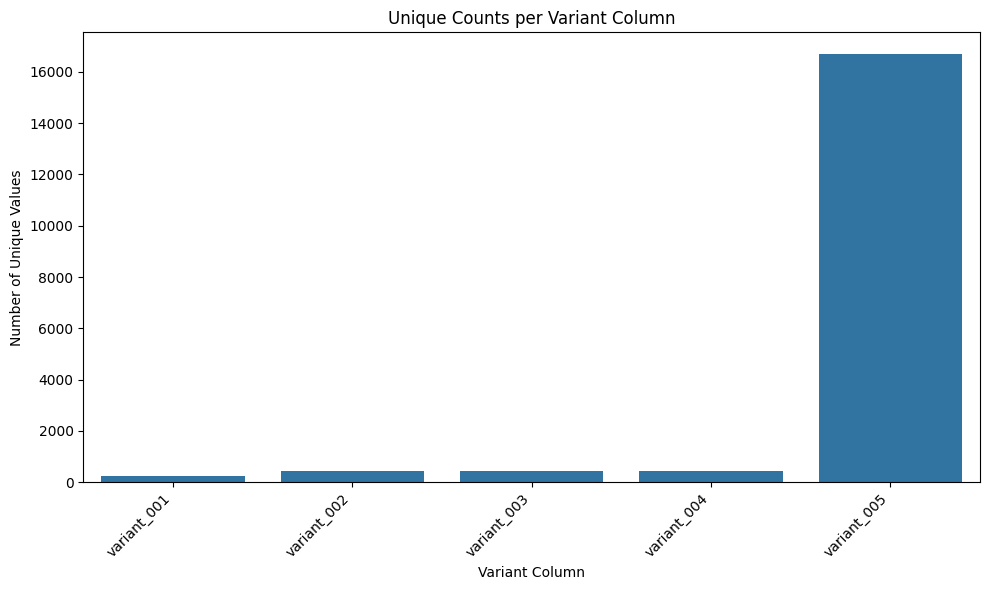

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

variant_cols = [col for col in df.columns if col.startswith('variant_')]
variant_unique_counts = df[[col for col in df.columns if col.startswith('variant_')]].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=variant_unique_counts.index, y=variant_unique_counts.values)
plt.title('Unique Counts per Variant Column')
plt.xlabel('Variant Column')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

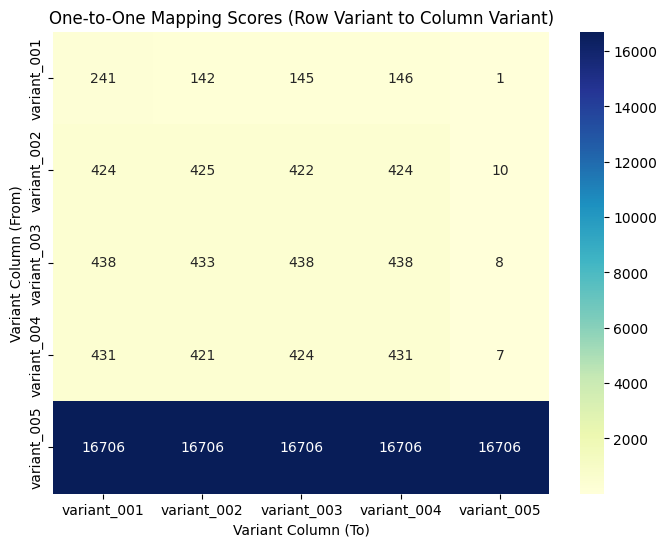

In [41]:
# Get the list of variant columns (in order)
cols = [col for col in df.columns if col.startswith('variant_')]
n_cols = len(cols)

# Create a matrix to store the heatmap data (for direction: row to column)
heatmap_data_row_to_col = np.zeros((n_cols, n_cols))

# Populate the matrix with the score from the row variant to the column variant
for i in range(n_cols):
    for j in range(n_cols):
        if i != j: # Exclude the diagonal for pairwise scores
            col1 = cols[i] # Row variant
            col2 = cols[j] # Column variant

            # Find the score for the pair (order matters here)
            score = None
            if (col1, col2) in one_to_one_scores:
                score = one_to_one_scores[(col1, col2)][0] # Score from col1 to col2
            elif (col2, col1) in one_to_one_scores:
                 score = one_to_one_scores[(col2, col1)][1] # Score from col2 to col1

            if score is not None:
                 heatmap_data_row_to_col[i, j] = score
        elif i == j:
             # Optional: Put unique counts on the diagonal
             if cols[i] in variant_unique_counts.index:
                 heatmap_data_row_to_col[i, j] = variant_unique_counts[cols[i]]


plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(heatmap_data_row_to_col,
            annot=True,     # Annotate cells with the score values
            fmt=".0f",      # Format annotations as integers
            cmap="YlGnBu",  # Color map
            xticklabels=cols, # Labels for x-axis
            yticklabels=cols) # Labels for y-axis

plt.title('One-to-One Mapping Scores (Row Variant to Column Variant)')
plt.xlabel('Variant Column (To)')
plt.ylabel('Variant Column (From)')
plt.show()

# 3. Strength of variant-pair

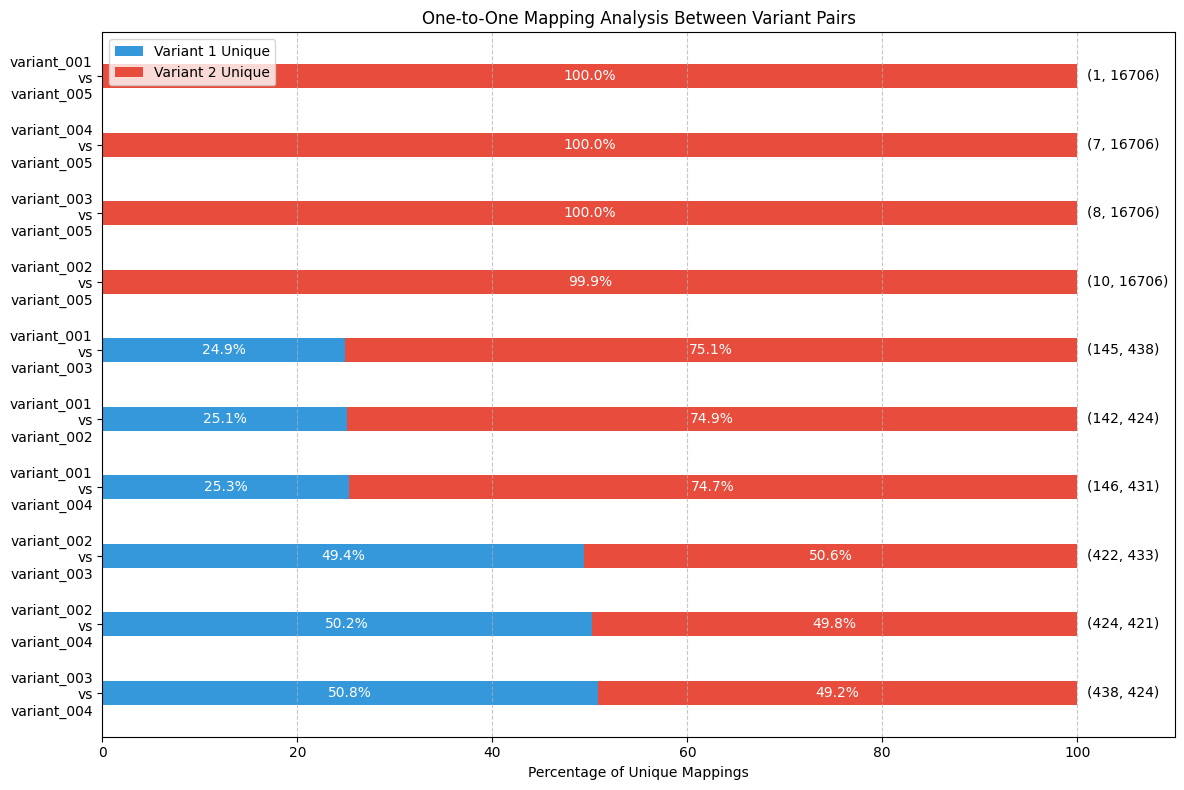

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# data from output
data = {
    ('variant_001', 'variant_002'): (142, 424),
    ('variant_001', 'variant_003'): (145, 438),
    ('variant_001', 'variant_004'): (146, 431),
    ('variant_001', 'variant_005'): (1, 16706),
    ('variant_002', 'variant_003'): (422, 433),
    ('variant_002', 'variant_004'): (424, 421),
    ('variant_002', 'variant_005'): (10, 16706),
    ('variant_003', 'variant_004'): (438, 424),
    ('variant_003', 'variant_005'): (8, 16706),
    ('variant_004', 'variant_005'): (7, 16706),
}

# Convert to percentages and prepare DataFrame
results = []
for (col1, col2), (count1, count2) in data.items():
    total = count1 + count2
    results.append({
        'Pair': f"{col1}\nvs\n{col2}",
        'Variant 1 Unique %': count1 / total * 100,
        'Variant 2 Unique %': count2 / total * 100,
        'Variant 1 Count': count1,
        'Variant 2 Count': count2
    })

df = pd.DataFrame(results)

# Sort by Variant 1 percentage
df = df.sort_values('Variant 1 Unique %', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(df))

# Create stacked bars
bars1 = plt.barh(index, df['Variant 1 Unique %'], bar_width,
                 color='#3498db', label='Variant 1 Unique')
bars2 = plt.barh(index, df['Variant 2 Unique %'], bar_width,
                 left=df['Variant 1 Unique %'],
                 color='#e74c3c', label='Variant 2 Unique')

# Add value labels
for i, (val1, val2) in enumerate(zip(df['Variant 1 Unique %'], df['Variant 2 Unique %'])):
    if val1 > 5:  # Only show label if there's enough space
        plt.text(val1/2, i, f"{val1:.1f}%", ha='center', va='center', color='white')
    if val2 > 5:
        plt.text(val1 + val2/2, i, f"{val2:.1f}%", ha='center', va='center', color='white')

# Add count labels at the end of each bar
for i, (count1, count2) in enumerate(zip(df['Variant 1 Count'], df['Variant 2 Count'])):
    plt.text(101, i, f"({count1}, {count2})", va='center')

plt.yticks(index, df['Pair'])
plt.xlabel('Percentage of Unique Mappings')
plt.title('One-to-One Mapping Analysis Between Variant Pairs')
plt.xlim(0, 110)  # Leave space for count labels
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

shows variant_002, variant_003, variant_004 indicating a more symmetrical one-to-one relationship.

things to know:
approximated_class_label:
This represents the best available class label (e.g.,
unique user or device) and serves as the approximate ground truth. It is 90%
accurate, meaning some degree of error exists. Use this field cautiously.


# Confirming variant_003 is approximated_class_label


In [37]:
#just curious and want to know how many unique approximated_class_label are there
query = """
SELECT
  COUNT(DISTINCT approximated_class_label) AS unique_approximated_class_label
FROM variants_data;
"""

result_df = pd.read_sql(query, conn)
print(result_df)

   unique_approximated_class_label
0                              438


In [38]:
def one_to_one_count(df, col1, col2):
    merged = df[[col1, col2]].dropna()
    group1 = merged.groupby(col1)[col2].nunique()
    group2 = merged.groupby(col2)[col1].nunique()
    return ((group1 == 1).sum(), (group2 == 1).sum())

# Assuming your DataFrame is named 'df'
target_col = 'approximated_class_label'
variant_cols = [col for col in df.columns if col.startswith('variant_')]

approximated_one_to_one_scores = {}

for variant_col in variant_cols:
    score = one_to_one_count(df, target_col, variant_col)
    approximated_one_to_one_scores[(target_col, variant_col)] = score

print(f"One-to-one mapping scores with {target_col}:")
for (col1, col2), score in approximated_one_to_one_scores.items():
    print(f"({col1}, {col2}): {score}")

One-to-one mapping scores with approximated_class_label:
(approximated_class_label, variant_001): (np.int64(438), np.int64(145))
(approximated_class_label, variant_002): (np.int64(433), np.int64(422))
(approximated_class_label, variant_003): (np.int64(438), np.int64(438))
(approximated_class_label, variant_004): (np.int64(438), np.int64(424))
(approximated_class_label, variant_005): (np.int64(8), np.int64(16706))


In [39]:
selected_columns_df = df[['approximated_class_label', 'variant_003']]
print(selected_columns_df.head())

   approximated_class_label                       variant_003
0                         1  c3a9d3629a8a5d86ad3d793cb3880697
1                         2  409b77f91d88b045105704377db1fe80
2                         3  ffb3cfbc3a442f69ddd7359343515d9f
3                         4  ae24786bc2e2a5f7a251c1c17fdf1984
4                         5  90ccd7cb90ec0d0eaf0c3c46c0d367ae


In [40]:
df['combined_label_variant003'] = df['approximated_class_label'].astype(str) + '_' + df['variant_003'].astype(str)
print(df[['approximated_class_label', 'variant_003', 'combined_label_variant003']].head())

   approximated_class_label                       variant_003  \
0                         1  c3a9d3629a8a5d86ad3d793cb3880697   
1                         2  409b77f91d88b045105704377db1fe80   
2                         3  ffb3cfbc3a442f69ddd7359343515d9f   
3                         4  ae24786bc2e2a5f7a251c1c17fdf1984   
4                         5  90ccd7cb90ec0d0eaf0c3c46c0d367ae   

            combined_label_variant003  
0  1_c3a9d3629a8a5d86ad3d793cb3880697  
1  2_409b77f91d88b045105704377db1fe80  
2  3_ffb3cfbc3a442f69ddd7359343515d9f  
3  4_ae24786bc2e2a5f7a251c1c17fdf1984  
4  5_90ccd7cb90ec0d0eaf0c3c46c0d367ae  


In [43]:
#just to verify that approximated_class_label is actually variant_003
unique_combined_count = df['combined_label_variant003'].nunique()

print(f"\nNumber of unique combined values ('approximated_class_label_variant_003'): {unique_combined_count}")


Number of unique combined values ('approximated_class_label_variant_003'): 438


This just indicates that approximated_class_label is variant_003 as the mapping is exactly one is to one

# 5. Conclusion


# Variant Analysis Report: Identifying the Best Persistent Device Identifier

##  Unique Variants Count Overview

| Variant     | Unique Count |
|-------------|-------------:|
| variant_001 |         241  |
| variant_002 |         425  |
| variant_003 |         438  |
| variant_004 |         431  |
| variant_005 |      16,706  |


### One-to-One Mapping Scores

```python
(variant_001, variant_002): (142, 424)
(variant_001, variant_003): (145, 438)
(variant_001, variant_004): (146, 431)
(variant_001, variant_005): (1, 16706)
(variant_002, variant_003): (422, 433)
(variant_002, variant_004): (424, 421)
(variant_002, variant_005): (10, 16706)
(variant_003, variant_004): (438, 424)
(variant_003, variant_005): (8, 16706)
(variant_004, variant_005): (7, 16706)

```


The conclusion would have been to use variant_005 as the primary persistent device identifier as it has the most unique counts. Theres a very high score of unique counts of 16706, however if it were to mapped in reverse, it shows a very low unique count. This means while almost every unique variant_005 value is uniquely paired with values in other variants, most unique values in other variants are not uniquely paired with a variant_005 value. variant_005 is highly unique but doesn't have a symmetrical one-to-one relationship with the others. which means a more balance and high unique count between both variants would be the target as a primary identifier. As shown from the strength of variant-pair which indicates variant_002, variant_003, and variant_004 having a more symmetrical one-to-one relationship indicating a stronger identifier than variant_005.

If i can explain in an analogy, it would be assuming each of the variants like books in a library variant_001 would be using bar code which may be outdated but get things done although not as effective as a shelf code.

variant_003 is a shelf code which variant_005 is like a genetic code of the bar whereby it has information on the size, the pages, quality of the book.

So naturally variant_005 has alot of different permutation (16706) but that also means its hard as a primary identifier to zoom down straight to it as there just too much attributes. Like a little tear or quality drop may affect the identifier as compared to variant_003 which shows books of that genre would be at that shelf etc.

variant_002 and variant_004 are almost as similar as variant_003 in terms of the unique and balances except variant_003 has a higher unique mapping

Hence variant_003 is better suit as primary persistent device identifier. which could even be concluded as the approximated_class_label share an identical resemblance to variant_003